In [265]:
import numpy as np
import matplotlib.pyplot as plt
import math
import context
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,rk4ODEinter41,rkckODEinter41

In [266]:
def sq_diff(v1,analy):
    diff=[(analy[i]-vi)**2 for i,vi in enumerate(v1)]
    return sum(diff)/(len(diff)-1)

<div id="problemrk4"><b>Problem RK4</b>


In the cell below, compare compare solutions to the test
problem

<div id="eq:test"><b>eq:test</b><div>

$$
  \begin{array}{l}
    \frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
  \end{array}
$$

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of ([eq:test](#eq:test)), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

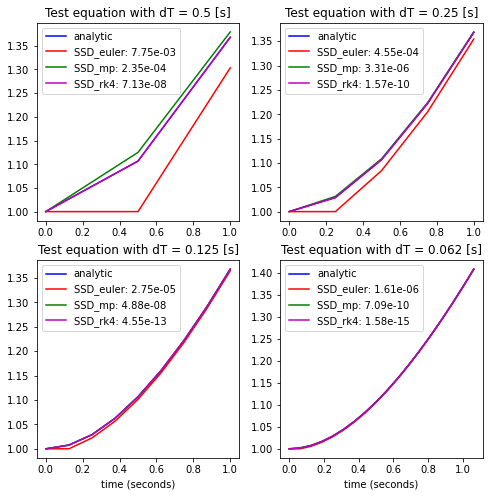

<Figure size 432x288 with 0 Axes>

In [267]:
def problemrk4(theAx,dt,titl,index):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.1,'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    y=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,y,timeVec[i-1])
        ye.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
        yrk.append(ynew)
        y=ynew
    analytic=timeVec + coeff.yinitial*np.exp(-timeVec)
    theFig=plt.figure(0)
    theFig.clf()
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    if index==1:
        theAx.set_xlabel('time (seconds)')
    ee = sq_diff(ye,analytic)
    em = sq_diff(ym,analytic)
    erk = sq_diff(yrk,analytic)
    l2=theAx.plot(timeVec,ye,'r',label='SSD_euler: '+str("{:.2e}".format(ee)))
    l3=theAx.plot(timeVec,ym,'g',label='SSD_mp: '+str("{:.2e}".format(em)))
    l4=theAx.plot(timeVec,yrk,'m',label='SSD_rk4: '+str("{:.2e}".format(erk)))
    theAx.legend(loc='best')
    theAx.set_title(titl)

    
fig,axs = plt.subplots(2,2,figsize=(8,8))
axi=[[0,0],[0,1],[1,0],[1,1]]
c = 1

for i in range(4):
    c =0.5*c
    problemrk4(axs[axi[i][0],axi[i][1]],c,'Test equation with dT = '+str(round(c,3))+' [s]',axi[i][0])

1. Regardless of the timestep used, 4th order Runge-Kutta outcompetes all the other methods by at least 4 orders of magnitude of better accuracy (evaluated with sum of square difference). The midpoint or Runge-Kutta second order is the second best with about 2 orders of magnite better accuracy than Euler's method. 

2. To asses the error I have used the sum of square differences from the analytical solution. It looks like halving the time steps makes both Runge-Kutta methods about 100 times more accurate while Euler method only improves by one order of magnitude.

<a name="problem_embedded"></a>

##### Problem embedded

Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
[eq:test2](#eq:test2]) 

<div id="eq:test2"><b>eq:test2</b></div>

$$
  \begin{array}{l}
    \frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
  \end{array}
$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

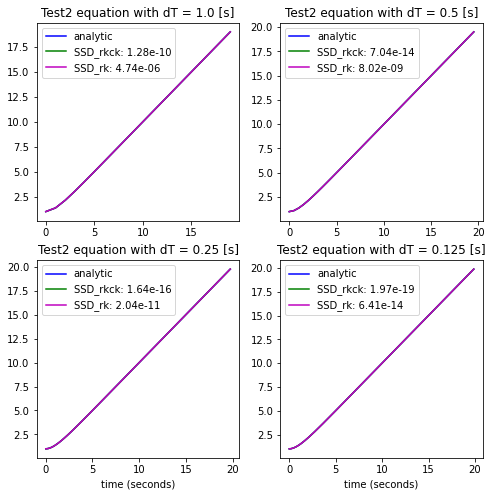

In [268]:
def problemembed(theAx,dt,titl,index):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':20.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    yrkck=[]
    y1=coeff.yinitial
    y2=coeff.yinitial
    yrk.append(coeff.yinitial)
    yrkck.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
        yrk.append(ynew)
        y1=ynew 
        ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
        yrkck.append(ynew)
        y2=ynew 
    analytic=timeVec + np.exp(-timeVec)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    if index==1:
        theAx.set_xlabel('time (seconds)')
    erkck = sq_diff(yrkck,analytic)
    erk = sq_diff(yrk,analytic)
    l2=theAx.plot(timeVec,yrkck,'g-',label='SSD_rkck: '+str("{:.2e}".format(erkck)))
    l3=theAx.plot(timeVec,yrk,'m-',label='SSD_rk: '+str("{:.2e}".format(erk)))
    theAx.legend(loc='best')
    theAx.set_title(titl)
    
fig,axs = plt.subplots(2,2,figsize=(8,8))
axi=[[0,0],[0,1],[1,0],[1,1]]
c = 2

for i in range(4):
    c =0.5*c
    problemembed(axs[axi[i][0],axi[i][1]],c,'Test2 equation with dT = '+str(round(c,3))+' [s]',axi[i][0])


1. Fifth order Runge Kutta gives a better approximation for all time-steps used.

2. Both methods are extremely accurate for the time-steps used. However, the change of error when halving is different when going from 1s to 0.5s time-steps. We see that RK4 improves its accuracy by $10^3$, while RK5 improves by $10^4$. Both methods reduce their improvement for smaller time-steps halvings, stabilizing at about 100 times improvement for each halving of dt.

##### Problem coding B

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets
    of initial conditions and determine if 
    there is any difference between the two methods when applied to
    either problem. Should there be? Explain by analyzing the steps
    that each method is taking.
    
2. Add your answer as new cells to the problem A notebook

<div id="eq:heuns"><b>Heun's Method (also referred to as Ralston's method)</b></div>
    Note: you may find a different definition of Heun's Method depending on the textbook you are reading)

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

<div id="Midpoint Method"><b>Midpoint Method</b></div>

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)\\
    y_{n+1} = y_n + k_2
  \end{array}
$$

SSD_Heun: 1.27569e+01
SSD_Midpoint: 1.27569e+01
SSD_Heun: 2.78940e-03
SSD_Midpoint: 2.78940e-03


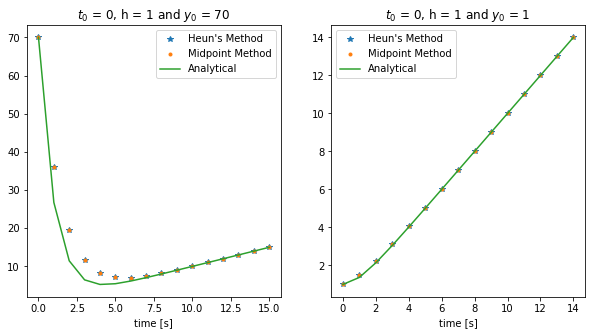

In [269]:
def fyt(y,t):
    return t-y+1.0

def analyt(t0,y0,T_end):
    t = np.arange(t0,T_end,h)
    y = y0*np.exp(-t)+t 
    return y,t

def heun_mid(t0,y0,h,T_end,a0,a1,b0,b1):
    y = [y0]
    t = [t0]
    for i in range(math.ceil(T_end/h)-1):
        k1 = h*fyt(y[i],t[i])
        k2 = h*fyt(y[i]+a0*k1,t[i]+a1*h)
        y.append(y[i]+b0*k1+b1*k2)
        t.append(t[i]+h)
    return y,t
def heun(t0,y0,h,T_end):
    return heun_mid(t0,y0,h,T_end,(2/3),(2/3),(1/4),(3/4))
def mid(t0,y0,h,T_end):
    return heun_mid(t0,y0,h,T_end,0.5,0.5,0,1)
def plotting(ax,T_end,t0,h,y0):
    yh,th = heun(t0,y0,h,T_end)
    ym,tm = mid(t0,y0,h,T_end)
    y,t = analyt(t0,y0,T_end)
    em = sq_diff(ym,y)
    eh = sq_diff(yh,y)
    ax.plot(th,yh,'*',label="Heun's Method")
    ax.plot(tm,ym,'.',label="Midpoint Method")
    ax.plot(t,y,label="Analytical")
    ax.legend()
    ax.set_xlabel('time [s]')
    ax.set_title('$t_0$ = '+str(t0)+', h = '+str(h)+' and $y_0$ = '+str(y0))
    print('SSD_Heun: '+str("{:.5e}".format(eh)))
    print('SSD_Midpoint: '+str("{:.5e}".format(em)))

T_end = 15.1
t0 = 0
h=1
y0=70
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
plotting(ax1,T_end,t0,h,y0)

T_end = 15
t0 = 0
h=1
y0=1
plotting(ax2,T_end,t0,h,y0)


There is no apparent difference between Heun's and Midpoint methods for the inditial conditions and time-step used, they return the same exact solution. This was the expected outcome since both methods rely on derivatives on intermediate points to calculate y(t+$\Delta t$), and f(y,t) is linear for y and t. If f(y,t) were not linear for y or t, the results would differ due to truncation error differences. 

##### Problem coding C

1.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

2.  Add cells that do this and also generate some plots, showing your along with the parameter values and
    initial conditions.

  $$\frac{dT}{dt} = -\lambda (T-T_a)$$ 

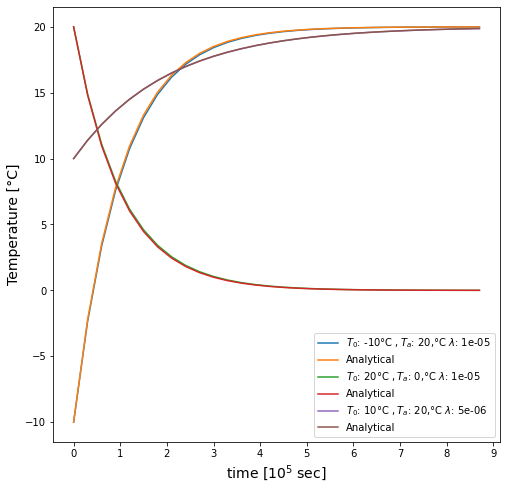

In [270]:
def fyt(T,t):
    return -lmd*(T-Ta)
    
def analyt(t0,y0,T_end):
    t = np.arange(t0,T_end,dt)
    y = Ta + (y0-Ta)*np.exp(-lmd*t)
    return y,t

def newplot(T0,Ta,lmd):
    Th,th= heun(t0,T0,dt,t_end)
    T,t= analyt(t0,T0,t_end)
    ax.plot(th,Th,label='$T_0$: '+str(T0)+'°C $, T_a$: '+str(Ta)+',°C $\lambda$: '+str(lmd))
    ax.plot(t,T,label='Analytical')

lmd = 1e-5 #s-1
Ta = 20
t0 = 0
T0 = -10
t_end = 9e5
dt = 3e4
fig,ax=plt.subplots(1,figsize=(8,8))
T,t= analyt(t0,T0,t_end)
newplot(T0,Ta,lmd)
lmd = 1e-5 #s-1
Ta = 0
T0 = 20
newplot(T0,Ta,lmd)
lmd =5e-6 #s-1
Ta = 20
T0 = 10
newplot(T0,Ta,lmd)

ticks=[]
for i in range(10):
    ticks.append(str(i))
ax.set_xticks(np.arange(0,9e5+1,1e5))
ax.set_xticklabels(ticks)
plt.xlabel('time [$10^5$ sec]',fontsize=14)
plt.ylabel('Temperature [°C]',fontsize=14)
plt.legend()

Heun's method does a great job solving the Newton's cooling law for any of the initial condition and parameters used.